In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from os import listdir
from os import path

In [46]:
def getResult(DIR):
    filename = [f for f in listdir(DIR) if f[-7:]=="ALL.out"][0]
    result = pickle.load(open(path.join(DIR, filename),"rb"))
    return result

In [5]:
def getStats(result, col):
    finalList = [tmp[col] for tmp in result]
    return{
        "len": len(result),
        "gain": (len([tmp for tmp in result if tmp[col]>=0])/len(result)),
        "loss": (len([tmp for tmp in result if tmp[col]<0])/len(result)),
        "mean": np.mean(finalList),
        "max": np.max(finalList),
        "min": np.min(finalList),
        "25percentile": np.percentile(finalList, 25),
        "50percentile": np.percentile(finalList, 50),
        "75percentile": np.percentile(finalList, 75),
    }

In [53]:
PARENT = "./output/"
resultList = []
statsList = []
for folder in listdir(PARENT):
    try:
        result = getResult(path.join(PARENT, folder))
        resultList.append([tmp['final'] for tmp in result])
        statsList.append(getStats(result))
        print(folder)
    except Exception as e:
        print(e)

list index out of range
2
3
4
list index out of range


In [11]:
result_list = []

In [13]:
DIR = "./output/8/"
fileName = "sp500_actual_04FEB2020.out"
result = pickle.load(open(path.join(DIR, fileName), "rb"))
result_list.append([tmp['act_final'] for tmp in result])

In [6]:
getStats(result, "final")

{'len': 100,
 'gain': 0.99,
 'loss': 0.01,
 'mean': 4177.2497294336445,
 'max': 7248.493422181367,
 'min': -415.6567747668996,
 '25percentile': 3397.3086615768775,
 '50percentile': 4420.708075576382,
 '75percentile': 4851.993683244028}

In [7]:
getStats(result, "act_final")

{'len': 100,
 'gain': 0.15,
 'loss': 0.85,
 'mean': -1443.853620221596,
 'max': 1627.3900725261265,
 'min': -6036.7601244221405,
 '25percentile': -2223.7946880783634,
 '50percentile': -1200.395274078859,
 '75percentile': -769.1096664112129}

In [14]:
DIR = "./output/9/"
fileName = "sp500_actual_10k Training_04FEB2020.out"
result = pickle.load(open(path.join(DIR, fileName), "rb"))
result_list.append([tmp['act_final'] for tmp in result])

In [9]:
getStats(result, "final")

{'len': 100,
 'gain': 1.0,
 'loss': 0.0,
 'mean': 3836.7289939544407,
 'max': 7277.7736251901115,
 'min': 0.0,
 '25percentile': 3089.4951271444197,
 '50percentile': 4135.47239940351,
 '75percentile': 4781.6249643936235}

In [10]:
getStats(result, "act_final")

{'len': 100,
 'gain': 0.09,
 'loss': 0.91,
 'mean': -1784.3743557008002,
 'max': 1656.6702755348706,
 'min': -5621.103349655241,
 '25percentile': -2531.608222510821,
 '50percentile': -1485.6309502517306,
 '75percentile': -839.4783852616174}

[Text(0, 0.5, 'Net Profit($)'),
 Text(0.5, 0, 'Training Time'),
 Text(0.5, 1.0, 'Net Profit of SP500 (50k vs 100k Training)\nTraining: 2004-2014, Testing 2015-2019')]

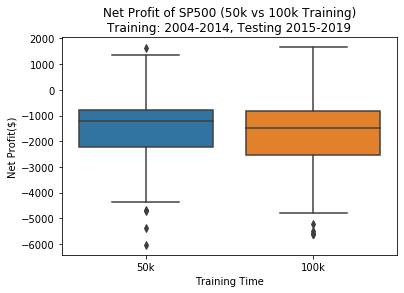

In [19]:
df = pd.DataFrame(result_list).transpose()
df.columns = ["50k", "100k"]
ax = sns.boxplot(data=df)
ax.set(xlabel='Training Time', ylabel='Net Profit($)', title = "Net Profit of SP500 (50k vs 100k Training)\nTraining: 2004-2014, Testing 2015-2019")


,20k,50k,100k
0,2075.615885,-1248.398855,245.521469
1,-171.669891,-2215.481184,-101.564494
2,-694.525057,0.000000,52.425577
3,870.029848,-127.824547,0.000000
4,473.828715,0.000000,2498.454278
...,...,...,...
95,586.734130,288.761938,0.000000
96,-1566.463416,-309.242769,0.000000
97,-1711.490926,-1430.729783,0.000000
98,370.868485,1078.673010,1977.533343
